## Tidal Forces

The dependence of the gravitational force on distance gives rise to tidal forces between different parts of an extended body in the gravitational field of another body.

The approximate tidal force by the Moon ($M$) for a point $P$ (test mass $m$) at distance $R \le R_E$

$$
\Delta \mathbf{F} \approx \frac{GMmR}{r^3}(2\cos\theta, -\sin\theta)
$$

where $r \gg R$ is the distance of Earth from the Moon.

The tidal force per unit mass for a grid of points with equal spacing along the x- and y-axes within a circle of radius $R = R_E$.

an approximate formula neglecting the rigidity of Earth height of the tidal buldge of Earth caused by the Moon

$$
h = \frac{3}{4} \frac{M}{M_{\text{earth}}} \frac{R_E^4}{r^3} \zeta, \quad \text{where } \zeta \approx \frac{5}{2}
$$

- https://doi.org/10.1016/0019-1035(66)90051-0

For a given position $(R_x, R_y)=R(\cos\theta, \sin\theta)$, the tidal acceleration $\mathbf{a}_{\text{tidal}} = \Delta \mathbf{F}/m$

$$
\mathbf{a}_{\text{tidal}}(\mathbf{R}) = \frac{GM}{r^3}(2R_x, -R_y)
$$

In [ ]:
import numpy as np 
from scipy.constants import g, G
from astropy.constants import R_earth, M_earth

M = 0.07346e24  # mass of the moon in kg
r = 3.844e8     # semi-major axis of moon orbit in m

coeff = G*M/r**3
accel_scale = 2*coeff*R_earth.value
print("tidal acceleration = {:.2e} m/s^2 = {:.2e} g".\
      format(accel_scale, accel_scale/g))

h = 15*M*R_earth.value**4/(8*M_earth.value*r**3)
print("height of tidal bulge = {:.2f} m".format(h))

# array of evenly spaced grid points along x- and y-axis
X = np.linspace(-1.1, 1.1, num=23, endpoint=True)
Y = np.linspace(-1.1, 1.1, num=23, endpoint=True)
print(X)

# create two-dimensional mesh grid scaled by Earth radius
R_x, R_y = np.meshgrid(R_earth.value*X, R_earth.value*Y)
print(R_x.shape)
print(R_x[11,21],R_y[11,21])

# radial distances of mesh points from (0,0)
R = np.sqrt(R_x*R_x + R_y*R_y)

# components of tidal acceleration field within Earth radius
accel_x = np.ma.masked_where(R > R_earth.value, 2*coeff*R_x)
accel_y = np.ma.masked_where(R > R_earth.value, -coeff*R_y)

tidal acceleration = 1.10e-06 m/s^2 = 1.12e-07 g
height of tidal bulge = 0.67 m
[-1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2
  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]
(23, 23)
6378100.0 0.0


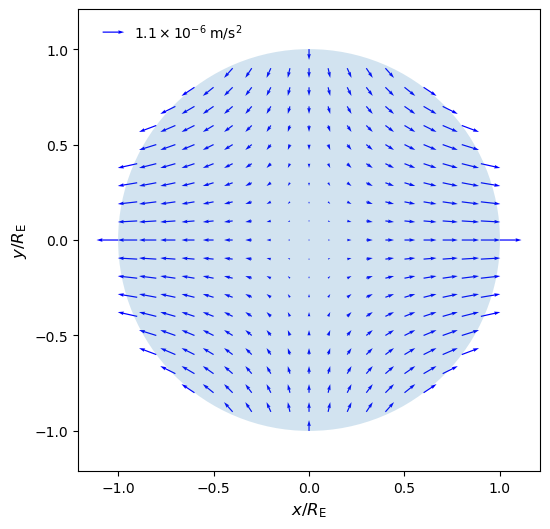

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# plot vector field
arrows = ax.quiver(X, Y, accel_x, accel_y, color='blue')
ax.quiverkey(arrows, X=0.1, Y=0.95, U=accel_scale,
             label=r'$1.1\times 10^{-6}\;\mathrm{m/s}^2$',
             labelpos='E')

# add a circle
circle = Circle((0, 0), 1, alpha=0.2, edgecolor=None)
ax.add_patch(circle)

ax.set_xlabel(r'$x/R_{\mathrm{E}}$', fontsize=12)
ax.set_ylabel(r'$y/R_{\mathrm{E}}$', fontsize=12)

plt.savefig("tidal_accel_earth.pdf")